In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [10]:
def get_max_factor(n_values, measured_times, complexity_type):
    if complexity_type == 'sqrt':
        theoretical = np.sqrt(n_values)
    else:  # linear
        theoretical = n_values
    factors = measured_times / theoretical
    return max(factors)

def get_min_time(measured_times):
    return min(measured_times)

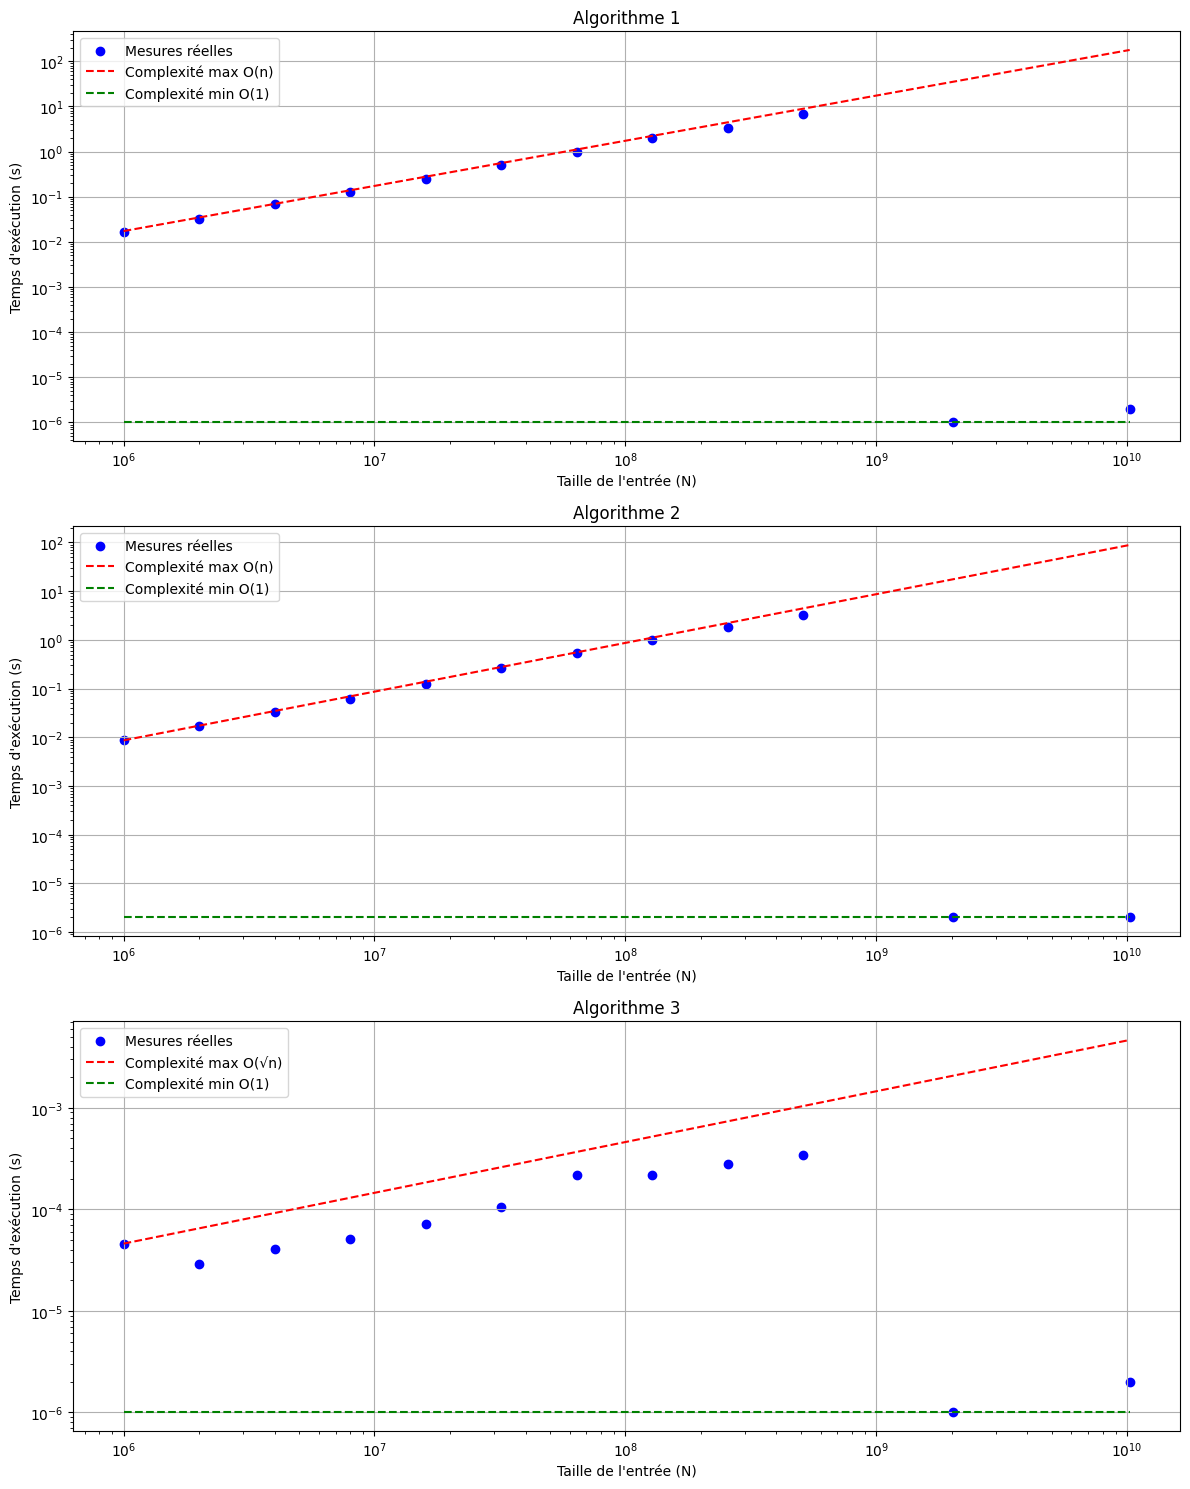

In [12]:
df = pd.read_csv('resultats.csv', header=None, 
                 names=['N', 'temps_algo1', 'temps_algo2', 'temps_algo3'])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

x_theory = np.linspace(min(df['N']), max(df['N']), 100)

# Graphique pour Algorithme 1 (O(n))
max_factor1 = get_max_factor(df['N'], df['temps_algo1'], 'linear')
min_time1 = get_min_time(df['temps_algo1'])

y_theory1_worst = max_factor1 * x_theory
y_theory1_best = np.full_like(x_theory, min_time1)

ax1.scatter(df['N'], df['temps_algo1'], color='blue', label='Mesures réelles')
ax1.plot(x_theory, y_theory1_worst, 'r--', label='Complexité max O(n)')
ax1.plot(x_theory, y_theory1_best, 'g--', label='Complexité min O(1)')
ax1.set_title('Algorithme 1')
ax1.set_xlabel('Taille de l\'entrée (N)')
ax1.set_ylabel('Temps d\'exécution (s)')
ax1.grid(True)
ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')

# Graphique pour Algorithme 2 (O(n))
max_factor2 = get_max_factor(df['N'], df['temps_algo2'], 'linear')
min_time2 = get_min_time(df['temps_algo2'])

y_theory2_worst = max_factor2 * x_theory
y_theory2_best = np.full_like(x_theory, min_time2)

ax2.scatter(df['N'], df['temps_algo2'], color='blue', label='Mesures réelles')
ax2.plot(x_theory, y_theory2_worst, 'r--', label='Complexité max O(n)')
ax2.plot(x_theory, y_theory2_best, 'g--', label='Complexité min O(1)')
ax2.set_title('Algorithme 2')
ax2.set_xlabel('Taille de l\'entrée (N)')
ax2.set_ylabel('Temps d\'exécution (s)')
ax2.grid(True)
ax2.legend()
ax2.set_xscale('log')
ax2.set_yscale('log')

# Graphique pour Algorithme 3 (O(√n))
max_factor3 = get_max_factor(df['N'], df['temps_algo3'], 'sqrt')
min_time3 = get_min_time(df['temps_algo3'])

y_theory3_worst = max_factor3 * np.sqrt(x_theory)
y_theory3_best = np.full_like(x_theory, min_time3)

ax3.scatter(df['N'], df['temps_algo3'], color='blue', label='Mesures réelles')
ax3.plot(x_theory, y_theory3_worst, 'r--', label='Complexité max O(√n)')
ax3.plot(x_theory, y_theory3_best, 'g--', label='Complexité min O(1)')
ax3.set_title('Algorithme 3')
ax3.set_xlabel('Taille de l\'entrée (N)')
ax3.set_ylabel('Temps d\'exécution (s)')
ax3.grid(True)
ax3.legend()
ax3.set_xscale('log')
ax3.set_yscale('log')

plt.tight_layout()

# Afficher le graphique
plt.show()